In [1]:
#importing the dependencies
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import the data
data=keras.datasets.mnist

In [3]:
#load the data
(train_images, train_labels),(test_images,test_labels)=data.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
train_images.shape


(60000, 28, 28)

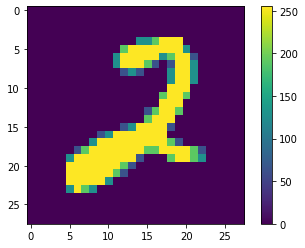

In [5]:
#verifying  the data
plt.figure()
plt.imshow(train_images[10009])
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
train_images=train_images/255.0
test_images=test_images/255.0

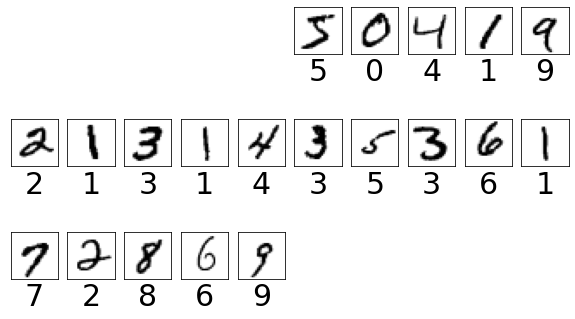

In [7]:
#verifying  the data
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,10,i+6)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(train_labels[i],size=30)
plt.show()

In [8]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10)
])

In [9]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.fit(train_images,train_labels,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 7s 2ms/step - loss: 0.4339 - accuracy: 0.8798
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1237 - accuracy: 0.9642
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0800 - accuracy: 0.9758
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0565 - accuracy: 0.9828
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0426 - accuracy: 0.9870
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0312 - accuracy: 0.9902
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0253 - accuracy: 0.9922
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0219 - accuracy: 0.9933
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0188 - accuracy: 0.9940
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.012

In [12]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)

313/313 - 1s - loss: 0.1161 - accuracy: 0.9758


In [13]:
prob_model=tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [14]:
pred=prob_model.predict(test_images)

In [15]:
pred[1000]

array([4.6668344e-13, 1.8506690e-08, 1.7496020e-17, 3.1864982e-07,
       1.1095023e-06, 1.1030452e-14, 1.6027131e-21, 1.8749027e-07,
       1.7185622e-13, 9.9999833e-01], dtype=float32)

In [16]:
np.argmax(pred[1000])

9

In [17]:
test_labels[1000]

9

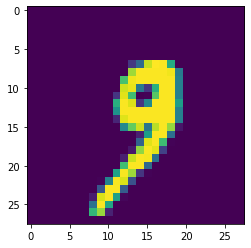

In [18]:
plt.imshow(test_images[1000])